In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
ans = np.random.choice(range(30), 10)

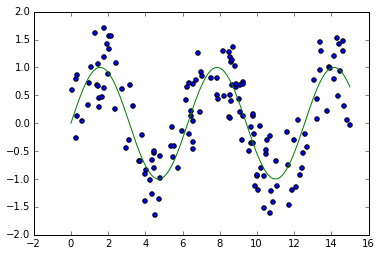

In [14]:
np.random.seed(0)

T_x = np.linspace(0, 15, 1000)[:, np.newaxis]
T_y = np.sin(T_x).ravel()

X = np.sort(15 * np.random.rand(150, 1), axis=0)
y = np.sin(X).ravel()

# Add noise to targets
y += 1.5 * (0.5 - np.random.rand(150))

plt.plot(T_x,T_y,c='g')
plt.scatter(X,y)

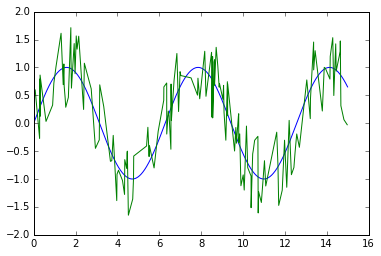

In [24]:
from sklearn.tree import DecisionTreeRegressor
rgr = DecisionTreeRegressor()
rgr.fit(X,y)

plt.plot(T_x, T_y)
plt.plot(X,rgr.predict(X))

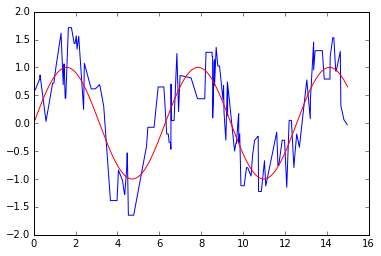

In [35]:
index = np.random.choice(range(len(X)), len(X))
rgr = DecisionTreeRegressor()
rgr.fit(X[index], y[index])
plt.plot(X, rgr.predict(X))
plt.plot(T_x, T_y, c='r')

In [44]:
from sklearn import cross_validation
from sklearn import metrics
x_train, x_test, y_train, y_test = cross_validation.train_test_split(X,y)

In [45]:
rgr = DecisionTreeRegressor()
rgr.fit(x_train, y_train)
metrics.mean_squared_error(y_test, rgr.predict(x_test))


0.35575357687713316

In [57]:
from sklearn.ensemble import BaggingRegressor
bag_rgr = BaggingRegressor()
bag_rgr.fit(x_train, y_train)



BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0)

In [58]:
metrics.mean_squared_error(y_test,bag_rgr.predict(x_test))

0.27275997261095375

In [76]:
num_trees = range(10,1000, 10)
mse = []

for i in range(0,len(num_trees)):
    bag_rgr = BaggingRegressor(n_estimators=num_trees[i])
    bag_rgr.fit(x_train, y_train)
    mse_inst = metrics.mean_squared_error(y_test,bag_rgr.predict(x_test))
    mse.append(mse_inst)

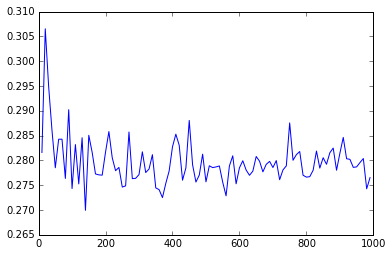

In [78]:
plt.plot(num_trees,mse)

In [82]:
data = pd.read_csv('https://raw.githubusercontent.com/galvin-mj/DAT_ATL_15/master/Datasets/winequality-red.csv', sep=';')

In [83]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [98]:
y = data['quality']
x=data.copy()
del x['quality']
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4


In [100]:
x_train,x_test,y_train,y_test = cross_validation.train_test_split(x,y)

In [101]:
from sklearn.ensemble import RandomForestClassifier
rgr = RandomForestClassifier()
rgr.fit(x_train,y_train)
y_pred = rgr.predict(x_test)

In [102]:
1.0*sum(y_pred==y_test)/len(y_pred)

0.6675

In [104]:
from sklearn.linear_model import LogisticRegression
lr_rgr = LogisticRegression()
lr_rgr.fit(x_train,y_train)
y_pred_lr = lr_rgr.predict(x_test)

In [105]:
1.0*sum(y_pred_lr==y_test)/len(y_pred_lr)

0.6125